In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import json
import time

# 定义一个函数来运行 train_mlp_numpy.py 并捕获输出
def run_training_script(batch_size='1', max_steps='1500'):
    result = subprocess.run([
        'python', 'train_mlp_numpy.py',
        '--batch_size', batch_size,
        '--max_steps', max_steps
    ], capture_output=True, text=True)
    return result.stdout

def run_and_plot(batch_size='1', max_steps='2'):
    # 运行训练脚本并捕获输出
    print(f'Running training script with batch size {batch_size} and {max_steps} steps')
    start_time = time.time()
    output = run_training_script(batch_size=batch_size, max_steps=max_steps)
    end_time = time.time()
    print(f'Training script ran in {end_time - start_time:.2f} seconds')

    # 解析输出，假设输出是 JSON 格式
    # print(output)
    lines = output.split('\n')
    train_accuracies = []
    test_accuracies = []
    train_losses = []
    test_losses = []
    for line in lines:
        if line.startswith('Step:'):
            parts = line.split(',')
            step = int(parts[0].split(':')[1].strip())

            train_loss = float(parts[1].split(':')[1].strip())
            test_loss = float(parts[2].split(':')[1].strip())

            train_losses.append((step, train_loss))
            test_losses.append((step, test_loss))

            train_accuracy = float(parts[3].split(':')[1].strip())
            test_accuracy = float(parts[4].split(':')[1].strip())
            
            train_accuracies.append((step, train_accuracy))
            test_accuracies.append((step, test_accuracy))

    # 提取步骤和准确率
    steps, train_acc = zip(*train_accuracies)
    _, test_acc = zip(*test_accuracies)

    # 绘制训练和测试数据的准确率曲线
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_acc, label='Training Accuracy')
    plt.plot(steps, test_acc, label='Test Accuracy')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    # plt.title('Training and Test Accuracy Curves')
    plt.legend()
    plt.savefig(f'images/batch_size_{batch_size}_accuracy.pdf')
    # plt.show()

    steps, train_loss = zip(*train_losses)
    _, test_loss = zip(*test_losses)

    # 绘制训练和测试数据的损失曲线
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, test_loss, label='Test Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    # plt.title('Training and Test Loss Curves')
    plt.legend()
    plt.savefig(f'images/batch_size_{batch_size}_loss.pdf')
    plt.show()

Running training script with batch size 0 and 1500 steps
Training script ran in 0.38 seconds


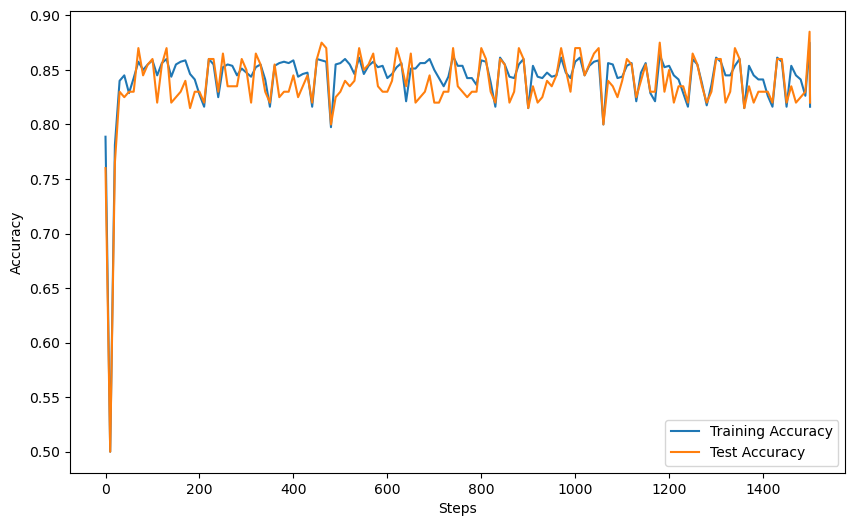

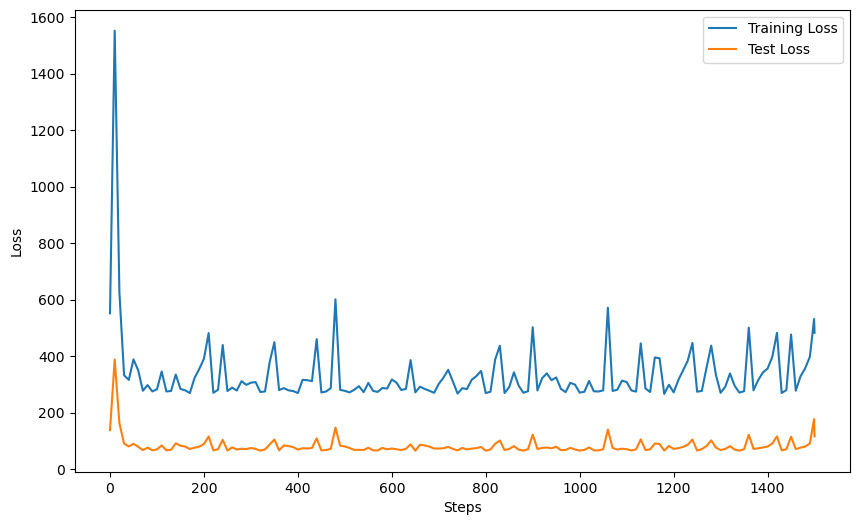

In [2]:
run_and_plot(batch_size='0', max_steps='1500')

Running training script with batch size 1 and 2 steps
Training script ran in 0.20 seconds


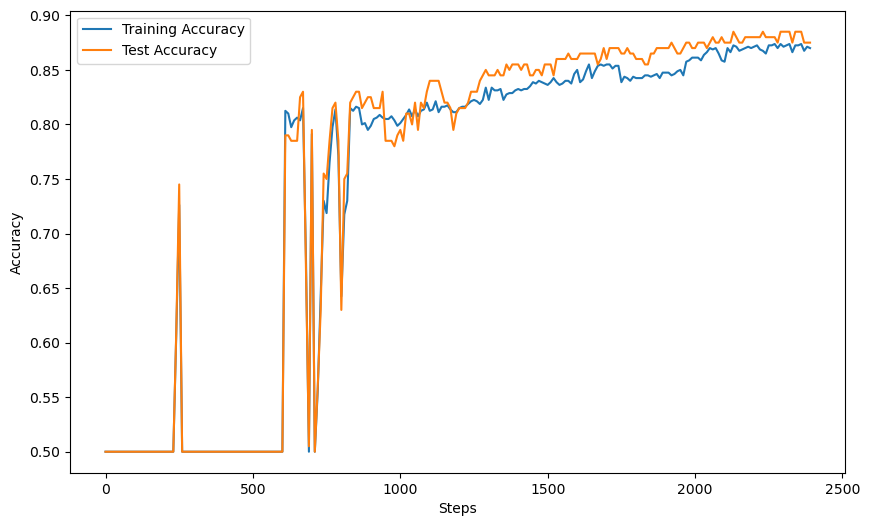

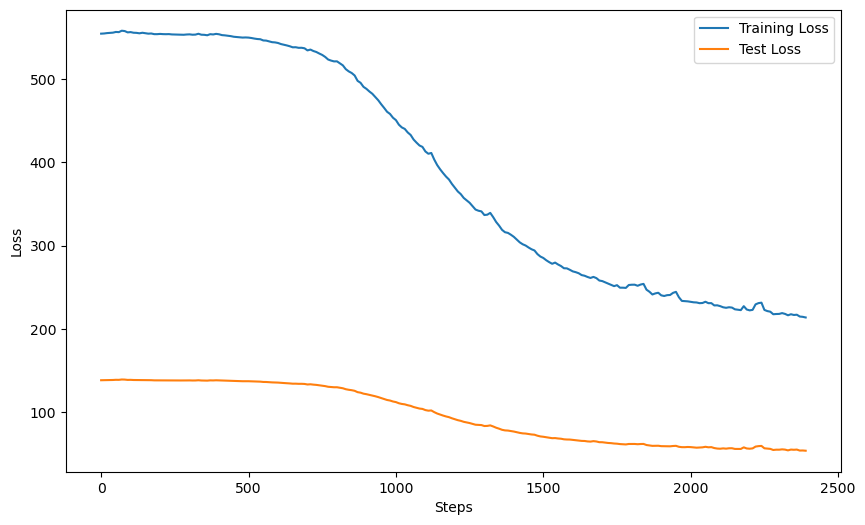

In [3]:
run_and_plot(batch_size='1', max_steps='2')


Running training script with batch size 10 and 19 steps
Training script ran in 0.18 seconds


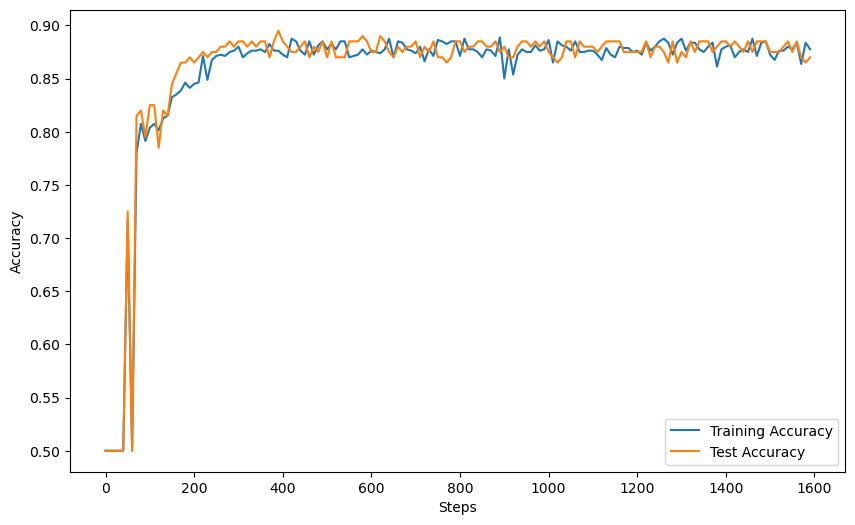

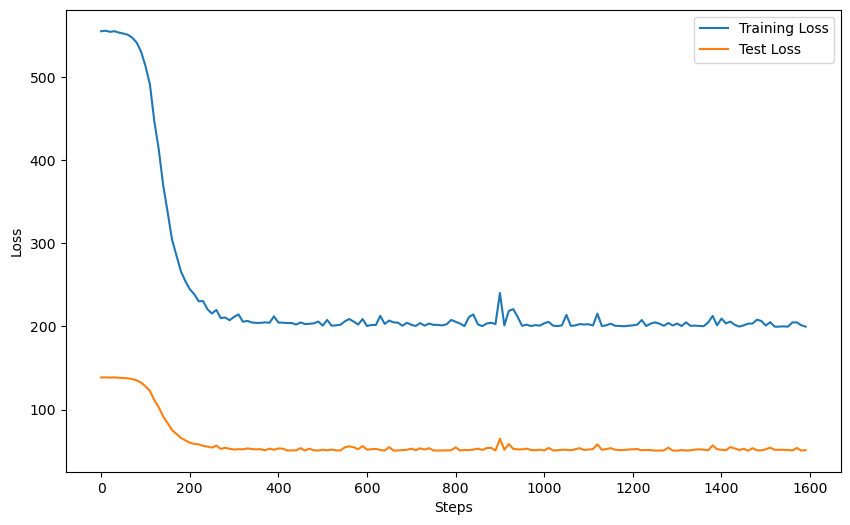

In [4]:
run_and_plot(batch_size='10', max_steps='19')


Running training script with batch size 50 and 94 steps
Training script ran in 0.20 seconds


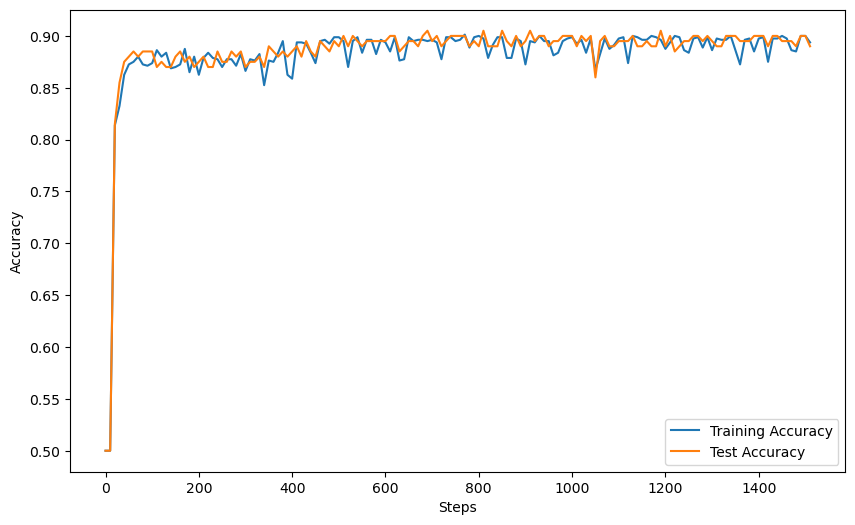

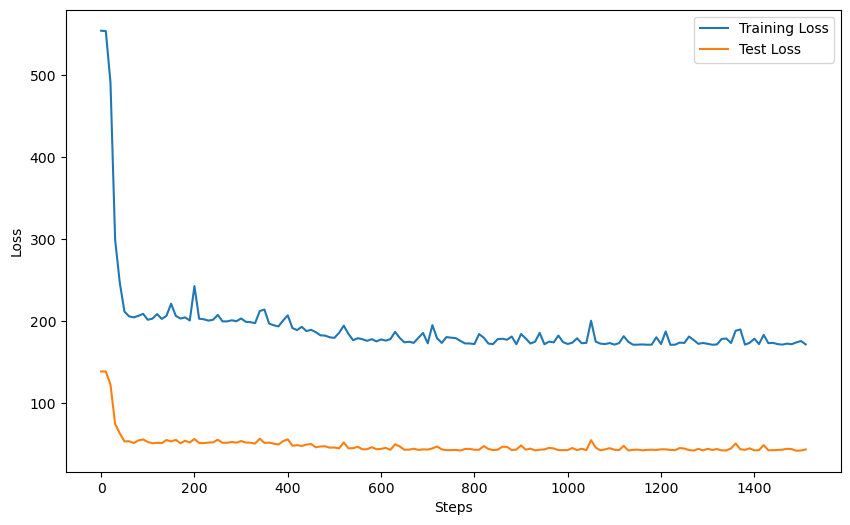

In [5]:
run_and_plot(batch_size='50', max_steps='94')


Running training script with batch size 100 and 225 steps
Training script ran in 0.26 seconds


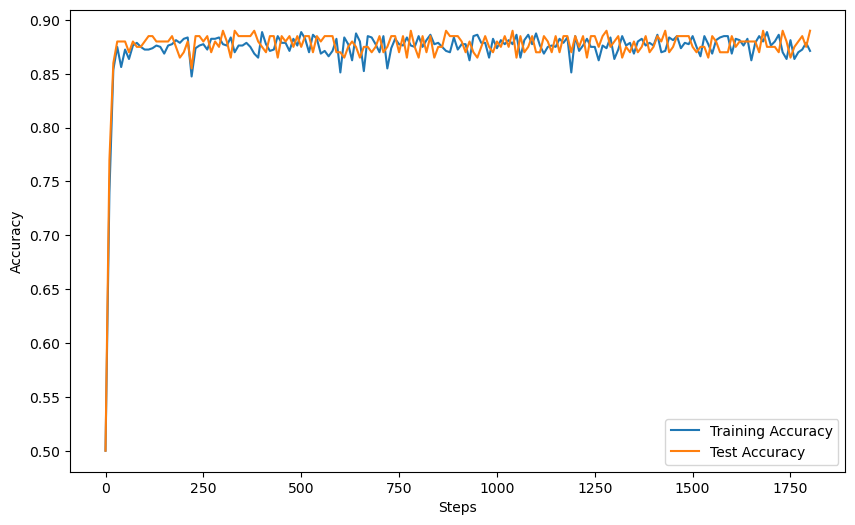

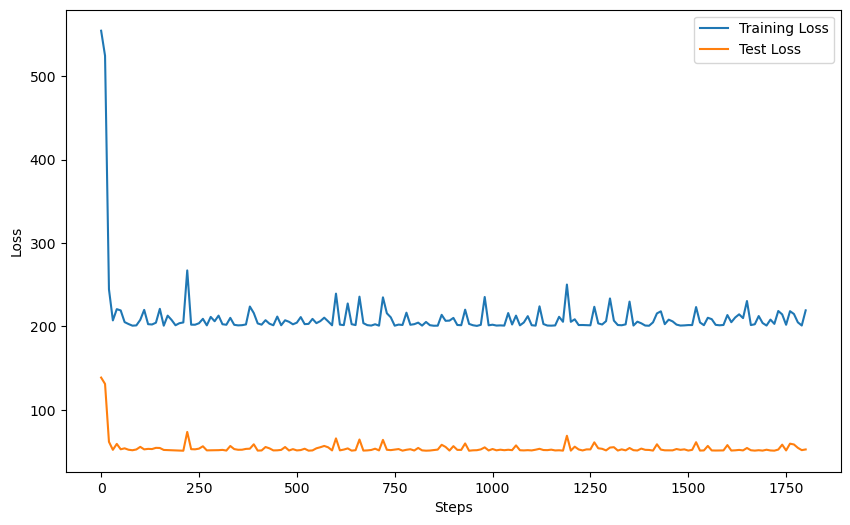

In [6]:
run_and_plot(batch_size='100', max_steps='225')